In [1]:
import pandas as pd
import numpy as np
import itertools



In [2]:
import matplotlib.pyplot as plt

import scipy.stats

In [5]:
import seaborn as sns ;
sns.set ()
import matplotlib.pyplot as plt

In [6]:
# read data from csv
nobelDataDf = pd.read_csv( "Nobel_N2.csv" )
nobelDataDf.head(-10)

,Year,Category,Name,Birthdate,Birth Place,County,Residence,Role/Affiliate,Field/Language,Prize Name,Motivation
0,1901,chemistry,Jacobus Henricus van 't Hoff,30 August 1852,Rotterdam,the Netherlands,No Data,"Berlin University, Berlin, Germany","Physical chemistry, chemical kinetics",The Nobel Prize in Chemistry,The Nobel Prize in Chemistry 1901 was awarded ...
1,1901,literature,Sully Prudhomme,16 March 1839,Paris,France,France,No Data,French,The Nobel Prize in Literature,The Nobel Prize in Literature 1901 was awarded...
2,1901,medicine,Emil Adolf von Behring,15 March 1854,Hansdorf (now Jankowa ?aga?ska),Prussia (now Poland),No Data,"Marburg University, Marburg, Germany",No Data,The Nobel Prize in Physiology or Medicine,The Nobel Prize in Physiology or Medicine 1901...
3,1901,peace,Frédéric Passy,20 May 1822,Paris,France,France,Founder and President of first French peace s...,"Humanitarian work, peace movement",The Nobel Peace Prize,The Nobel Peace Prize 1901 was awarded jointly...
4,1901,peace,Jean Henry Dunant,8 May 1828,Geneva,Switzerland,Switzerland,Originator Geneva Convention (Convention de G...,"Humanitarian work, peace movement",The Nobel Peace Prize,The Nobel Peace Prize 1901 was awarded jointly...
...,...,...,...,...,...,...,...,...,...,...,...
824,2009,peace,Barack H. Obama,4-Aug-61,Honolulu HI,USA,USA,44th President of the United States of America,"World organizing, arms control and disarmament",The Nobel Peace Prize,The Nobel Peace Prize 2009 was awarded to Bara...
825,2009,physics,Charles K. Kao,4-Nov-33,Shanghai,China,No Data,"Standard Telecommunication Laboratories, Harl...","Fiber technology, instrumentation",The Nobel Prize in Physics,"The Nobel Prize in Physics 2009 was divided, o..."
826,2009,physics,George E. Smith,10-May-30,White Plains NY,USA,No Data,"Bell Laboratories, Murray Hill, NJ, USA","Semiconductor technology, instrumentation",The Nobel Prize in Physics,"The Nobel Prize in Physics 2009 was divided, o..."
827,2009,physics,Willard S. Boyle,19-Aug-24,Amherst NS,Canada,No Data,"Bell Laboratories, Murray Hill, NJ, USA","Semiconductor technology, instrumentation",The Nobel Prize in Physics,"The Nobel Prize in Physics 2009 was divided, o..."


In [7]:
disciplines = nobelDataDf['Category'].unique()
pays=nobelDataDf['County'].unique()

print(pays.shape)
print(type(pays))
print(pays)


(123,)
<class 'numpy.ndarray'>
['the Netherlands' 'France' 'Prussia (now Poland)' 'Switzerland'
 'Prussia (now Germany)' 'Schleswig (now Germany)' 'India' 'Sweden'
 'Norway' 'Faroe Islands' 'United Kingdom' 'Russian Empire (now Poland)'
 'Scotland' 'Spain' 'Russia' 'Belgium' 'Poland' 'Germany'
 'Austrian Empire (now Czech Republic)' 'Hungary (now Slovakia)'
 'Tuscany (now Italy)' 'Italy' 'USA' 'Bavaria (now Germany)'
 'British India' 'Austrian Empire (now Italy)' 'New Zealand'
 'East Friesland (now Germany)' 'Russian Empire (now Ukraine)' 'Denmark'
 'Luxembourg' 'Russian Empire' 'Hesse-Kassel (now Germany)'
 'Germany (now Russia)' 'Mecklenburg (now Germany)' 'Austria'
 'Prussia (now Russia)' 'Australia' 'Austria-Hungary (now Slovenia)'
 'Ireland' 'Canada' 'Dutch East Indies (now Indonesia)'
 'Austrian Empire (now Austria)' 'Germany (now Poland)'
 'Württemberg (now Germany)' 'Argentina' 'Austria-Hungary (now Hungary)'
 'Austria-Hungary' 'Switzerland.' 'Austria-Hungary (now Croatia)'
 'R

In [8]:
pays= pays.tolist()

In [9]:
disciplines=disciplines.tolist()

In [10]:
##### turn to numpy array
nobelData = nobelDataDf.to_numpy()
nobelData[1:2,:] # seulement les 2 premières colonnes

numpy.ndarray

AFC permet d’étuder un lien entre différentes modalités de chaque vari-
able. Pour cela nous il vaut mieux travailler en terme de proportion.La pre-mère étape consiste à calculer la somme des effectifs du tableau de données puis diviser la matrice des effectifs par ce grand total.

In [12]:
#nobleData = pd.crosstab(nobelDataDf['County'], nobelDataDf['Category'])
nobelData = pd.crosstab(nobelDataDf['County'], nobelDataDf['Category'], margins=True, margins_name='Total')
nobelData # tableau de contingence 124 pays x 6 spécialités

Category,chemistry,economics,literature,medicine,peace,physics,Total
County,,,,,,,
Algeria,0,0,1,0,0,1,2
Argentina,0,0,0,2,2,0,4
Australia,1,0,0,7,0,2,10
Austria,2,1,1,5,2,2,13
Austria-Hungary,1,0,0,0,0,1,2
...,...,...,...,...,...,...,...
Vietnam,0,0,0,0,1,0,1
West Germany,1,0,0,0,0,4,5
Württemberg (now Germany),0,0,0,1,0,0,1


In [15]:
# total of all nobel prizes
Data = np.array(nobelData)
grandTotal = np.sum(Data[0:123,0:6])
print(grandTotal)
Data=Data[0:123,0:6] # 839 nb personnes qui ont obtenu un prix nobel

839


In [16]:
# total of all nobel prizes
# we will work with proportions
correspondenceMatrix = np.divide(Data , grandTotal )
print(correspondenceMatrix.shape)
correspondenceMatrix # matrice des fréquences (probabilités), par exemple 1 Algérien sur 839 a obtenu un prix nobel de physique


(123, 6)


array([[0.        , 0.        , 0.0011919 , 0.        , 0.        ,
        0.0011919 ],
       [0.        , 0.        , 0.        , 0.00238379, 0.00238379,
        0.        ],
       [0.0011919 , 0.        , 0.        , 0.00834327, 0.        ,
        0.00238379],
       [0.00238379, 0.0011919 , 0.0011919 , 0.00595948, 0.00238379,
        0.00238379],
       [0.0011919 , 0.        , 0.        , 0.        , 0.        ,
        0.0011919 ],
       [0.0011919 , 0.        , 0.        , 0.        , 0.        ,
        0.        ],
       [0.0011919 , 0.        , 0.        , 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.0011919 , 0.00238379, 0.        ,
        0.        ],
       [0.0011919 , 0.        , 0.        , 0.0011919 , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.0011919 ],
       [0.0011919 , 0.        , 0.        , 0.        , 0.        ,
        0.        ],
       [0.        , 0

Créer une matrice d’indépendance Analyser les relation les relations entre variables et modalités revient à constater un écart a une situation d’uniformité. Cette situation d’unifromité (cas
d’indépendance des variables) est exprimée par la matrice d’indépendance
qui se calcul simplement avec le produit de la somme marginale des lignes
(vecteur colonne) par la somme marginale de colonnes (vecteur ligne).

In [17]:
# row and column marginal totals
# axis =0 veut dire somme en iterant sur l'axe 0
rowTotals = np.sum(correspondenceMatrix , axis =1) # => fi.
columnTotals = np.sum(correspondenceMatrix , axis =0) # => f.j

# Independence matrix
independenceModel = np.outer ( rowTotals , columnTotals ) # => fi.*f.j

In [20]:
#Calculer le Ch-2 statistique
#Afin de voir si il y’a bien une distribution dependante des modalites

# χ2 =∑i∑j N*(fij − fi.*f.j)2 / fi.*f.j
chiSquaredStatistic = grandTotal * np.sum ( np . square (
correspondenceMatrix - independenceModel ) / independenceModel )
print (" Chi -2 statistique calcul manuel ")
print( chiSquaredStatistic )

# Residuals by substracting the expected propotions from the observed proportions
standardizedResiduals = (correspondenceMatrix - independenceModel) / np.sqrt(independenceModel)
# => permet de voir si il y a une dépendance entre les modalités

 Chi -2 statistique calcul manuel 
781.0534259656201


In [19]:
from scipy.stats import chi2_contingency


# Question

Appliquer le test d'indépendance avec la fonction chi2-contingency 
et décider si l'hypothèse d'indépendance est à rejetter ou non

Si la région de rejet est unilatérale du type t>c, alors pour une valeur t0 observée après expérience la P-valeur
est P(T >t0 |H0) si H0 est vraie. 

In [29]:
res_test = chi2_contingency(Data)
t0 = res_test[0]
P_valeur = res_test[1] 
# print("P_valeur = ", P_valeur) # = 3.077558446283406e-06 
# P_valeur = 0.00000307755 assez petite -> rejet de H0

a = 0.05
if P_valeur < a:
    print("On rejette H0")
else:
    print("H0 est vraie")


On rejette H0


# Question: 
Définir la matrice de travail W à diagonaliser (telle qu'elle a été définie dans le cours pour )

In [51]:
# W = Dn^(-1/2) * F * Dn^(-1/2)
# Wij = f_ij / sqrt(fi.*f.j)
# ce n'est autre que la matrice standardiedResiduals
W = (correspondenceMatrix - independenceModel) / np.sqrt(independenceModel)
print(W)


Décomposition en valeurs singulères (SVD)
La décomposition en valeurs singulères fait la même chose que la diagonalisation mais elle s’applique aux matrices non carées. l’application de SVD à notre matrice d’écart à l’indépendance (standardizedResiduals) retourne les
éléments suivants :
• u : matrice des vecteurs propres pour les lignes (rows)
• v : matrice des vecteurs propres pour les colonnes (columns)
• s : matrice des valeurs propres correspondants


In [53]:
# singular value decomposition ( SVD )
u ,s , v = np . linalg . svd ( W , full_matrices = False )

print("dim_u = ", u.shape)
print("dim_v = ", v.shape)

dim_u =  (123, 6)
dim_v =  (6, 6)


# Question

Quelle est la dimension de l'espace des vecteurs u ? 
Quelle est la dimension l'espace des vecteurs v  ?
Quelle relation entre les valeurs singulières s et les valeurs propres pour l'AFC ? 

Le principe de décomposition en valeurs singulières d'une matrice A à diagonaliser, indique que ces valeurs là sont les racines des valeurs propres.
En effet, en multipliant les matrices de vecteurs propres lignes et colonnes (u et v) par par les valeurs singulières (s), nous récupérons les coordonnées des lignes et des colonnes dans les plans factoriels.

# Donner le code nécéssaire qui permet de  déterminer

rowCoordinates  (Matrice Psi dans le cours ) 
et 
colCoordinates (Matrice Phi dans le cours )

In [69]:
# compute rows and colomns coordinates
# s : matrice des valeurs propres 

rows = u / np.sqrt (rowTotals[:, np.newaxis])
cols = v / np.sqrt (columnTotals[:, np.newaxis])

rowCoordinates = np.dot(rows , np.diag (np.sqrt(s)))
colCoordinates = np.dot(cols , np.diag (np.sqrt(s)))

print("dim_rowCoordinates = ", rowCoordinates.shape)
print("dim_columnCoordinates = ", colCoordinates.shape)



dim_rowCoordinates =  (123, 6)
dim_columnCoordinates =  (6, 6)


In [75]:
dfFirstTwoComponentsC = pd.DataFrame(colCoordinates[:,0:2] , columns =[ 'Factorial_axis_1' , 'Factorial_axis_2'] , index = disciplines)

dfFirstTwoComponentsR = pd.DataFrame(rowCoordinates[:,0:2] , columns =[ 'Factorial_axis_1' , 'Factorial_axis_2'] , index = pays)

# dfFirstTwoComponents = dfFirstTwoComponentsR.append(dfFirstTwoComponentsC)
# AttributeError: 'DataFrame' object has no attribute 'append'

dfFirstTwoComponents = pd.concat([dfFirstTwoComponentsR, dfFirstTwoComponentsC])


Préparation du graphique
A présent nous allons tout mettre dans des dataframe Pandas puis nous
allons déssiner les points dans le graphes ainsi que leurs labels grace à pyplot
scatter

In [76]:
type(colCoordinates[:,0:2])

numpy.ndarray

In [78]:
# turn to dataframe , that woult be easy to plot the result
dfFirstTwoComponentsC = pd.DataFrame ( data =[ l[0:2] for l in colCoordinates] , columns =[ ' Factorial_axis_1 ' , 'Factorial_axis_2 '] , index = disciplines )

dfFirstTwoComponentsR = pd.DataFrame( data =[ l[0:2] for l in rowCoordinates ] , columns =[ ' Factorial_axis_1 ' , 'Factorial_axis_2 '] , index = pays )

dfFirstTwoComponents = pd.concat([dfFirstTwoComponentsR, dfFirstTwoComponentsC])


In [79]:
# ccete ccellule est une autre manière d'écrire la cellule préccédente
dfFirstTwoComponentsC = pd.DataFrame ( colCoordinates[:,0:2] , columns =[ 'Factorial_axis_1' , 'Factorial_axis_2'],index = disciplines )

dfFirstTwoComponentsR = pd.DataFrame( rowCoordinates[:,0:2] , columns =[ 'Factorial_axis_1' , 'Factorial_axis_2'],index = pays )

#dfFirstTwoComponents = dfFirstTwoComponentsR.append (dfFirstTwoComponentsC )

dfFirstTwoComponents=pd.concat([dfFirstTwoComponentsR,dfFirstTwoComponentsC])


In [80]:
# One list with all labels
points = pays + disciplines
points

['the Netherlands',
 'France',
 'Prussia (now Poland)',
 'Switzerland',
 'Prussia (now Germany)',
 'Schleswig (now Germany)',
 'India',
 'Sweden',
 'Norway',
 'Faroe Islands',
 'United Kingdom',
 'Russian Empire (now Poland)',
 'Scotland',
 'Spain',
 'Russia',
 'Belgium',
 'Poland',
 'Germany',
 'Austrian Empire (now Czech Republic)',
 'Hungary (now Slovakia)',
 'Tuscany (now Italy)',
 'Italy',
 'USA',
 'Bavaria (now Germany)',
 'British India',
 'Austrian Empire (now Italy)',
 'New Zealand',
 'East Friesland (now Germany)',
 'Russian Empire (now Ukraine)',
 'Denmark',
 'Luxembourg',
 'Russian Empire',
 'Hesse-Kassel (now Germany)',
 'Germany (now Russia)',
 'Mecklenburg (now Germany)',
 'Austria',
 'Prussia (now Russia)',
 'Australia',
 'Austria-Hungary (now Slovenia)',
 'Ireland',
 'Canada',
 'Dutch East Indies (now Indonesia)',
 'Austrian Empire (now Austria)',
 'Germany (now Poland)',
 'Württemberg (now Germany)',
 'Argentina',
 'Austria-Hungary (now Hungary)',
 'Austria-Hungary',


In [81]:
dfFirstTwoComponents['Factorial_axis_1'][10]

0.640912022036823

In [82]:

print(type(dfFirstTwoComponents))


<class 'pandas.core.frame.DataFrame'>


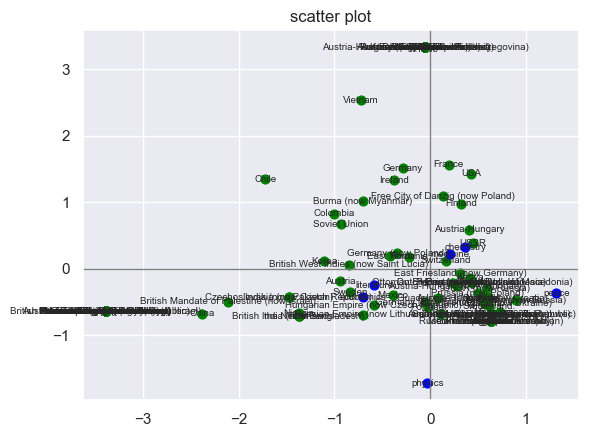

In [83]:
# plot the points
fig,ax_kwargs = plt.subplots ()

plt.scatter ( dfFirstTwoComponentsR [ 'Factorial_axis_1'] ,
dfFirstTwoComponentsR ['Factorial_axis_2'] , s = 40 , c =  'green')

plt.scatter ( dfFirstTwoComponentsC [ 'Factorial_axis_1'] ,
dfFirstTwoComponentsC [ 'Factorial_axis_2'] , s = 40 , c ='blue' )

plt.title ('scatter plot')

ax_kwargs.axvline ( c = 'grey' , lw =1)
ax_kwargs.axhline ( c = 'grey' , lw =1)

for i , txt in enumerate (points):
    
     ax_kwargs.annotate (txt, (dfFirstTwoComponents['Factorial_axis_1'][i] , dfFirstTwoComponents['Factorial_axis_2' ][i]), horizontalalignment = 'center' , verticalalignment = 'center', size =7)

plt.show()

In [84]:
# procédure explicative de la boucle for ci dessus
for i , txt in enumerate (points):
     print(i, txt) 


0 the Netherlands
1 France
2 Prussia (now Poland)
3 Switzerland
4 Prussia (now Germany)
5 Schleswig (now Germany)
6 India
7 Sweden
8 Norway
9 Faroe Islands
10 United Kingdom
11 Russian Empire (now Poland)
12 Scotland
13 Spain
14 Russia
15 Belgium
16 Poland
17 Germany
18 Austrian Empire (now Czech Republic)
19 Hungary (now Slovakia)
20 Tuscany (now Italy)
21 Italy
22 USA
23 Bavaria (now Germany)
24 British India
25 Austrian Empire (now Italy)
26 New Zealand
27 East Friesland (now Germany)
28 Russian Empire (now Ukraine)
29 Denmark
30 Luxembourg
31 Russian Empire
32 Hesse-Kassel (now Germany)
33 Germany (now Russia)
34 Mecklenburg (now Germany)
35 Austria
36 Prussia (now Russia)
37 Australia
38 Austria-Hungary (now Slovenia)
39 Ireland
40 Canada
41 Dutch East Indies (now Indonesia)
42 Austrian Empire (now Austria)
43 Germany (now Poland)
44 Württemberg (now Germany)
45 Argentina
46 Austria-Hungary (now Hungary)
47 Austria-Hungary
48 Switzerland.
49 Austria-Hungary (now Croatia)
50 Russia

# Question
Interpréter le graphique de projection et interpréter la relation entre les modalités des 2 variables

Les points regroupés les uns des autres tendent à être associés aux mêmes modalités des deux variables. Par exemple, Hungary et Austria se situent dans la même zone du graphique, donc les deux pays sont associés à un nombre élevé de prix Nobel décernés. Contrairement, les points éloignés sont associés à des modalités différentes des deux variables.
Le test du Chi2 nous a permis déjà de déterminer si l'association entre les variables est statistiquement significative.